In [18]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import posixpath
import pandas as pd
import wfdb
from wfdb import processing
from scipy.signal import find_peaks,butter, lfilter, freqz
import tqdm
import requests
from scipy.signal import find_peaks, butter, filtfilt
import neurokit2 as nk

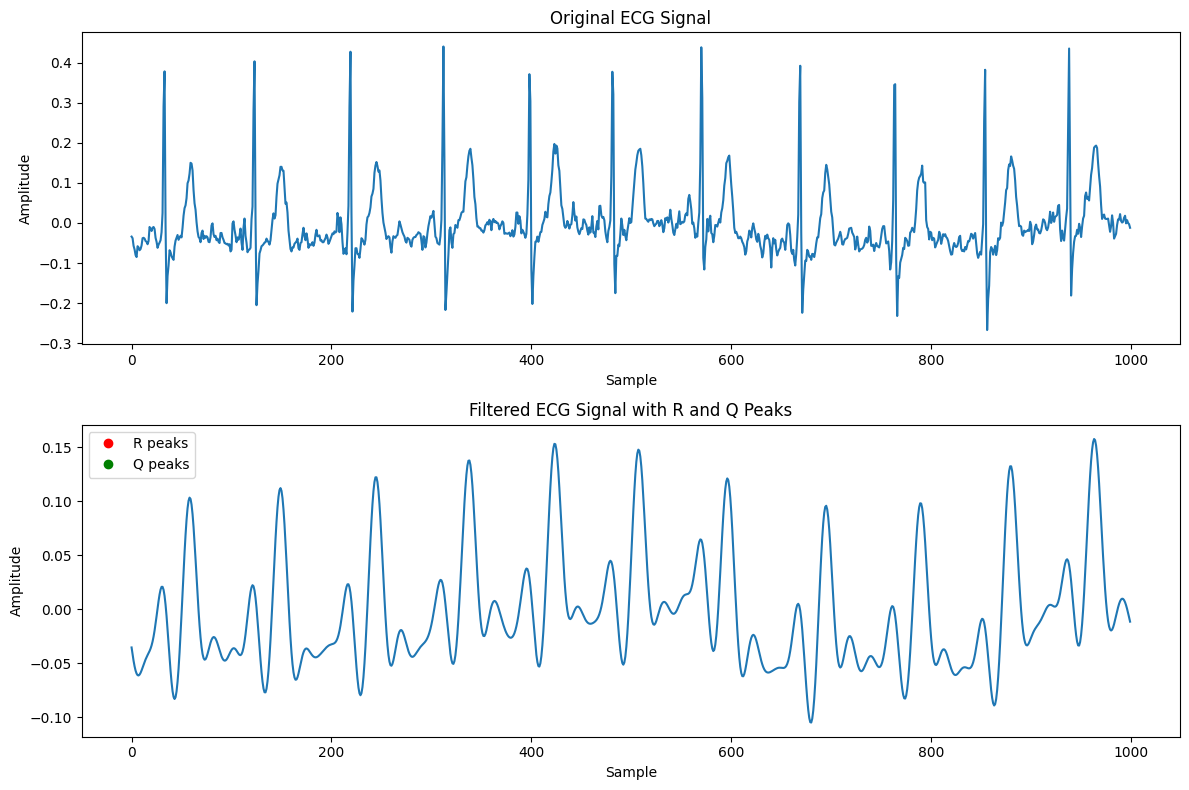

In [46]:
record = wfdb.rdrecord('ptbxl_specific_chunk/00005_lr')
signal = record.p_signal[:,0]  

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# low-pass filter
fs = record.fs 
cutoff = 5  
filtered_signal = butter_lowpass_filter(signal, cutoff, fs)

# Find R peaks in the filtered signal
r_peaks, _ = find_peaks(filtered_signal, distance=0.2*fs, prominence=0.5)  
# Q peaks
q_peaks = []
for r_peak in r_peaks:
    window_start = max(0, r_peak - int(0.1*fs))
    window = filtered_signal[window_start:r_peak]
    q_peak = window_start + np.argmin(window)
    q_peaks.append(q_peak)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.plot(r_peaks, filtered_signal[r_peaks], 'ro', label='R peaks')
plt.plot(q_peaks, filtered_signal[q_peaks], 'go', label='Q peaks')
plt.title('Filtered ECG Signal with R and Q Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

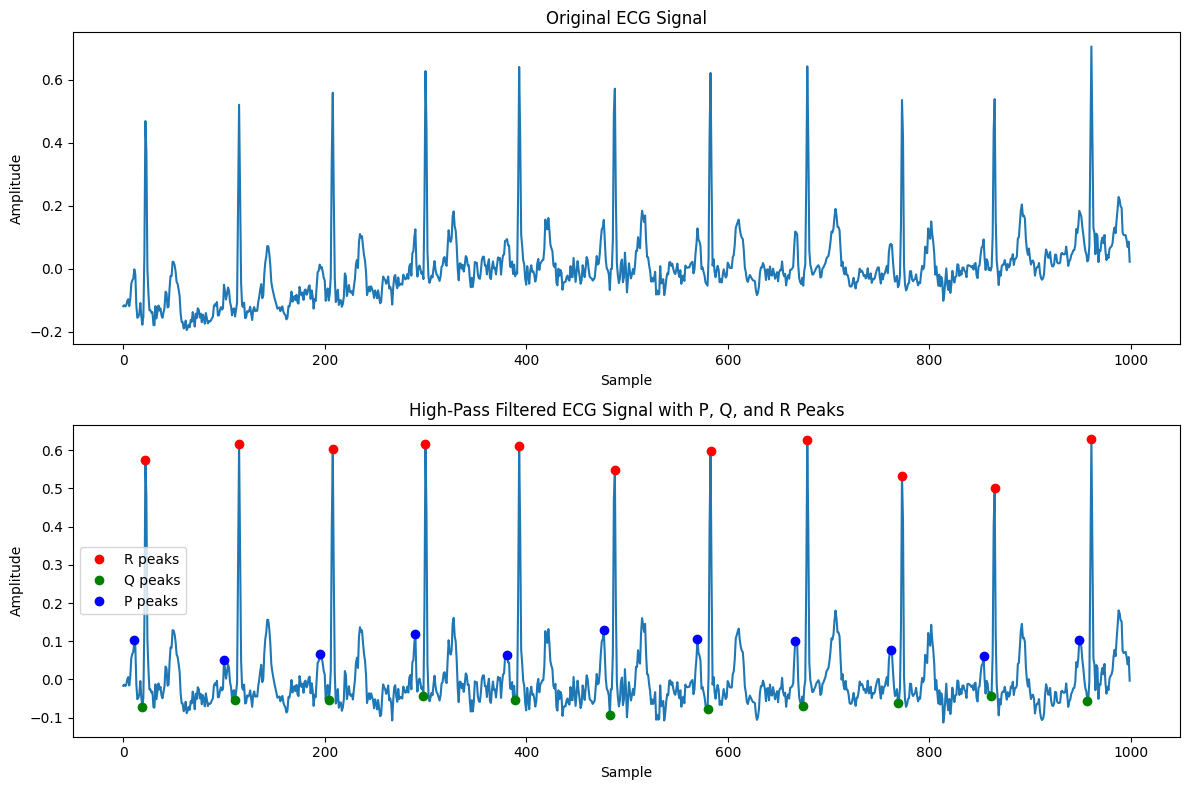

In [61]:
record = wfdb.rdrecord('ptbxl_specific_chunk/00001_lr')
signal = record.p_signal[:,0]  

r
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# high-pass filter
fs = record.fs  
cutoff = 0.3  
filtered_signal = butter_highpass_filter(signal, cutoff, fs)

# R peaks
r_peaks, _ = find_peaks(filtered_signal, distance=0.4*fs, prominence=0.3) 

# Q peaks
q_peaks = []
for r_peak in r_peaks:
    window_start = max(0, r_peak - int(0.1*fs))
    window = filtered_signal[window_start:r_peak]
    q_peak = window_start + np.argmin(window)
    q_peaks.append(q_peak)

# P peaks
p_peaks = []
for r_peak in r_peaks:
    window_start = max(0, r_peak - int(0.3*fs))
    window_end = max(0, r_peak - int(0.05*fs))
    window = filtered_signal[window_start:window_end]
    p_peak = window_start + np.argmax(window)
    p_peaks.append(p_peak)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.plot(r_peaks, filtered_signal[r_peaks], 'ro', label='R peaks')
plt.plot(q_peaks, filtered_signal[q_peaks], 'go', label='Q peaks')
plt.plot(p_peaks, filtered_signal[p_peaks], 'bo', label='P peaks')
plt.title('High-Pass Filtered ECG Signal with P, Q, and R Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()